In [1]:
!pip install networkx
!pip install matplotlib
!pip install numpy
!pip install python-louvain
!pip install pyvis


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


===== RINGKASAN DATA FACEBOOK COMBINED =====
Total Baris Data (TXT):           88234
Total Node (Akun):                4039
Total Edge (Pertemanan):          88234
Total Degree (Total Hubungan):    176468
Rata-rata Degree per Node:        43.69

Jumlah Komunitas Terdeteksi : 17


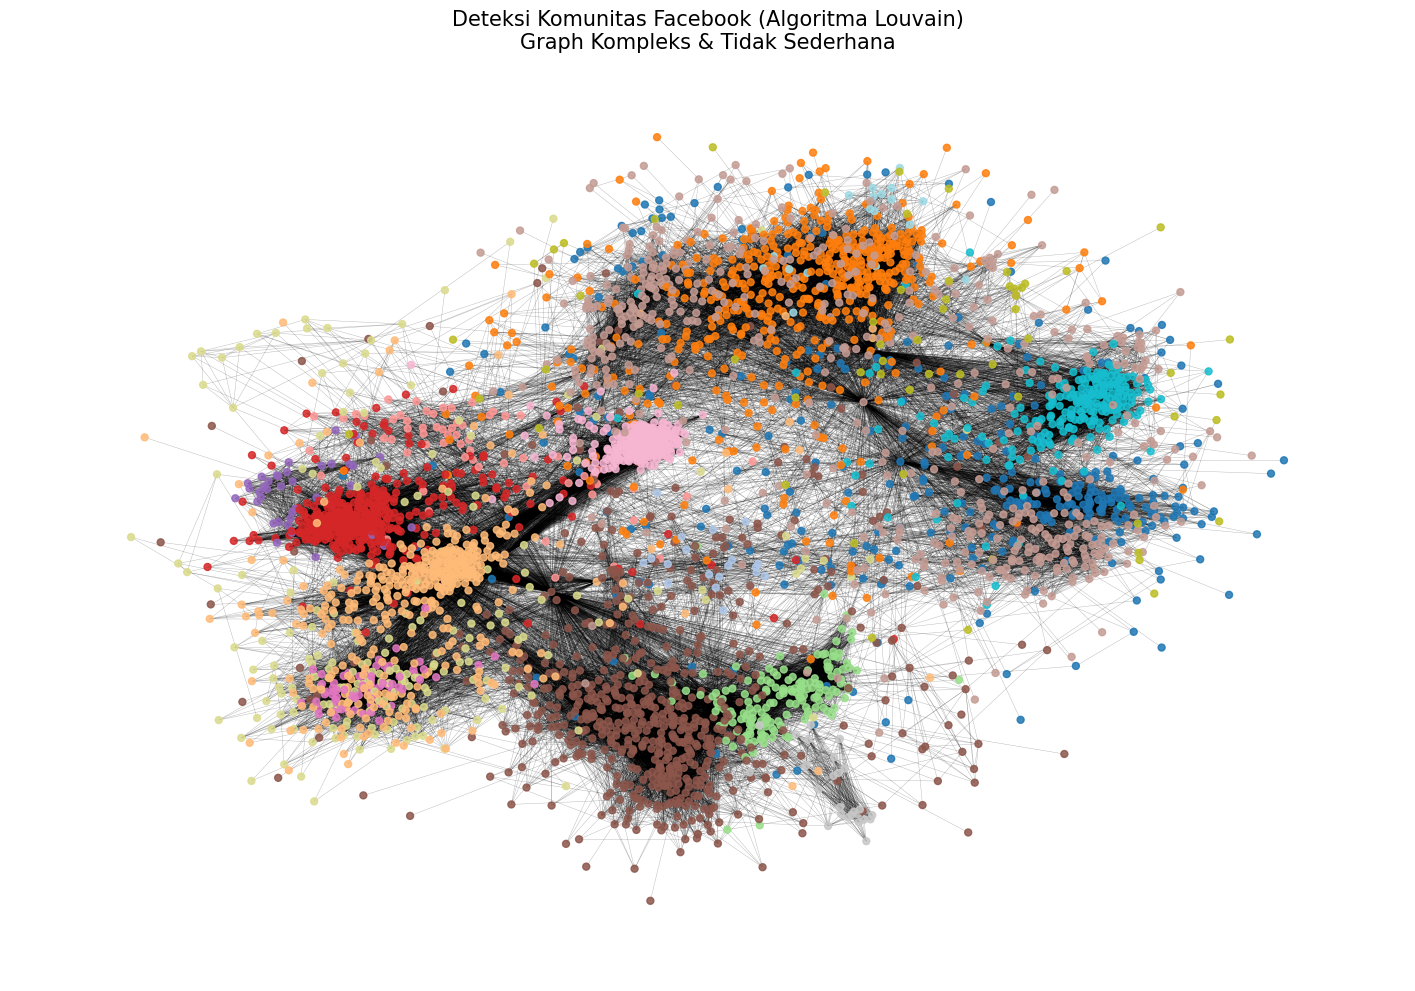

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import numpy as np
import random

# -----------------------------------------------------------
# 1. Load dataset facebook_combined
# -----------------------------------------------------------
path = "facebook_combined.txt"

# Hitung total baris data (jumlah edge dalam file txt)
with open(path, "r") as f:
    total_rows = sum(1 for line in f)

# Load graph
G = nx.read_edgelist(path, create_using=nx.Graph(), nodetype=int)

# Hitung statistik jaringan
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()
total_degree = sum(dict(G.degree()).values())   # total semua degree

# -----------------------------------------------------------
# RINGKASAN DATA
# -----------------------------------------------------------
print("===== RINGKASAN DATA FACEBOOK COMBINED =====")
print(f"Total Baris Data (TXT):           {total_rows}")
print(f"Total Node (Akun):                {total_nodes}")
print(f"Total Edge (Pertemanan):          {total_edges}")
print(f"Total Degree (Total Hubungan):    {total_degree}")
print(f"Rata-rata Degree per Node:        {total_degree/total_nodes:.2f}")
print("=============================================\n")


# -----------------------------------------------------------
# 2. Deteksi komunitas (Algoritma Louvain)
# -----------------------------------------------------------
partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))
print("Jumlah Komunitas Terdeteksi :", num_communities)

# -----------------------------------------------------------
# 3. Visualisasi 2D graph (kompleks)
# -----------------------------------------------------------
plt.figure(figsize=(18, 12))

pos = nx.spring_layout(G, k=0.15, iterations=50)
colors = [partition[node] for node in G.nodes()]

nx.draw_networkx_nodes(
    G, pos,
    node_size=25,
    node_color=colors,
    cmap=plt.cm.tab20,
    alpha=0.85
)

nx.draw_networkx_edges(
    G, pos,
    width=0.3,
    alpha=0.3
)

plt.title("Deteksi Komunitas Facebook (Algoritma Louvain)\nGraph Kompleks & Tidak Sederhana", fontsize=15)
plt.axis('off')
plt.show()
